In [23]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [24]:
def add_layer(inputs, in_size, out_size, activation_func=None):
    with tf.name_scope("layer"):
        with tf.name_scope("weights"):
            Weights = tf.Variable(tf.random_normal([in_size, out_size]), name="W")
        with tf.name_scope("biases"):
            biases = tf.Variable(tf.zeros([1, out_size]) + 0.1, name="B")
        Wx_b = tf.matmul(inputs, Weights) + biases
        if activation_func is None:
            outputs = Wx_b
        else:
            outputs = activation_func(Wx_b)
        return outputs

In [25]:
x_data = np.linspace(-1, 1, 300, dtype=np.float32)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape)
y_data = np.square(x_data) - 0.5 + noise
with tf.name_scope("inputs"):
    xs = tf.placeholder(dtype=tf.float32, shape=[None, 1], name="x_input")
    ys = tf.placeholder(dtype=tf.float32, shape=[None, 1], name="y_input")

In [26]:
l1 = add_layer(xs, 1, 10, activation_func=tf.nn.relu)
l2 = add_layer(l1, 10, 1, activation_func=None)

In [27]:
with tf.name_scope("loss"):
    loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - l2), reduction_indices=[1]), name="loss")
with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(loss)


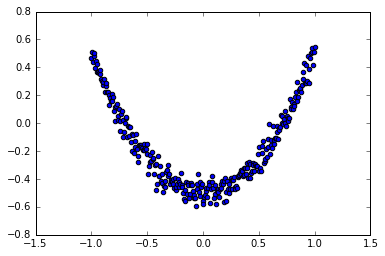

In [28]:
figure = plt.figure()
ax = figure.add_subplot(1,1,1)
ax.scatter(x_data, y_data)


In [30]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    writer = tf.Summary.FileWriter("./", sess.graph)
    sess.run(init)
    for i in range(1000):
        sess.run(optimizer, feed_dict={xs:x_data, ys:y_data})
        if i % 100 == 0:
            try:
                ax.lines.remove(lines[0])
            except Exception:
                pass
            prediction = sess.run(l2, feed_dict={xs:x_data, ys:y_data})
            lines = ax.plot(x_data, prediction, 'r-', lw=5)

AttributeError: type object 'Summary' has no attribute 'FileWriter'